Now it's time to play with some data. You're going to work through the stages of model preparation we've covered in this lesson and write up each one. Keep a good record in a Jupyter notebook – we'll come back to your features in a future model-building assignment on Least Squares Regression.

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 120
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math
import seaborn as sns

In [3]:
#Import our Dataframe, downloaded from kaggle.com
df = pd.read_csv('2016 School Explorer.csv', delimiter= ',')
df

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,...,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - Hispanic or Latino,Grade 7 ELA 4s - Asian or Pacific Islander,Grade 7 ELA 4s - White,Grade 7 ELA 4s - Multiracial,Grade 7 ELA 4s - Limited English Proficient,Grade 7 ELA 4s - Economically Disadvantaged,Grade 7 Math - All Students Tested,Grade 7 Math 4s - All Students,Grade 7 Math 4s - American Indian or Alaska Native,Grade 7 Math 4s - Black or African American,Grade 7 Math 4s - Hispanic or Latino,Grade 7 Math 4s - Asian or Pacific Islander,Grade 7 Math 4s - White,Grade 7 Math 4s - Multiracial,Grade 7 Math 4s - Limited English Proficient,Grade 7 Math 4s - Economically Disadvantaged,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,3.101000e+11,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",PK,5,Yes,0.919,"$31,141.72",9%,5%,32%,60%,92%,1%,94%,18%,89%,Me

In [4]:
# This dataframe does require some cleaning, part of which is renaming some of the 
df.rename(columns = {'Trust %':'Trust_Percent',
                  'Rigorous Instruction %' : 'Rigorous_Instruction_Percent',
                  'Collaborative Teachers %': 'Collaborative_Teachers_Percent',
                  'Supportive Environment %': 'Supportive_Environment_Percent',
                  'Effective School Leadership %':'Effective_School_Leadership_Percent',
                  'Strong Family-Community Ties %':'Strong_Family_Community_Ties_Percent',
                  'Average Math Proficiency' : 'Average_Math_Proficiency',
                  'Average ELA Proficiency' : 'Average_ELA_Proficiency',
                  'School Income Estimate' : 'School_Income_Estimate',
                  'Percent of Students Chronically Absent' : 'Percent_Students_Chronically_Absent'}, inplace = True)

In [5]:
df['City'] = df.City.str.lower().str.strip()

In [6]:
df.groupby('City').count()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School_Income_Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent_Students_Chronically_Absent,Rigorous_Instruction_Percent,Rigorous Instruction Rating,Collaborative_Teachers_Percent,Collaborative Teachers Rating,Supportive_Environment_Percent,Supportive Environment Rating,Effective_School_Leadership_Percent,Effective School Leadership Rating,Strong_Family_Community_Ties_Percent,Strong Family-Community Ties Rating,Trust_Percent,Trust Rating,Student Achievement Rating,Average_ELA_Proficiency,Average_Math_Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,...,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - Hispanic or Latino,Grade 7 ELA 4s - Asian or Pacific Islander,Grade 7 ELA 4s - White,Grade 7 ELA 4s - Multiracial,Grade 7 ELA 4s - Limited English Proficient,Grade 7 ELA 4s - Economically Disadvantaged,Grade 7 Math - All Students Tested,Grade 7 Math 4s - All Students,Grade 7 Math 4s - American Indian or Alaska Native,Grade 7 Math 4s - Black or African American,Grade 7 Math 4s - Hispanic or Latino,Grade 7 Math 4s - Asian or Pacific Islander,Grade 7 Math 4s - White,Grade 7 Math 4s - Multiracial,Grade 7 Math 4s - Limited English Proficient,Grade 7 Math 4s - Economically Disadvantaged,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
arverne,0,0,0,2,2,2

In [7]:
queens = ['arverne', 'astoria', 'bayside', 'broad channel', 'cambria heights', 'college point', 'corona', 'douglaston',
         'elmhurst', 'east elmhurst', 'far rockaway', 'flushing', 'forest hills', 'glendale', 'hollis',
         'howard beach', 'jackson heights', 'jamaica','kew gardens', 'little neck', 'long island city', 'maspeth',
         'middle village','ozone park', 'queens village', 'rego park', 'richmond hill', 'rockaway beach', 'rockaway park',
         'rosedale', 'saint albans', 'south ozone park', 'south richmond hill', 'springfield gardens','whitestone', 
         'woodhaven', 'woodside', 'ridgewood']
df['City'] = df['City'].apply(lambda x: 'Queens' if x in queens else x)

nassau_county = ['bellerose', 'floral park']
df['City'] = df['City'].apply(lambda x: 'Nassau County' if x in nassau_county else x)

new_york = ['new york', 'roosevelt island']
df['City'] = df['City'].apply(lambda x: 'Manhattan' if x in new_york else x)

In [8]:
df['City'] = df.City.str.upper()
df.groupby('City').count()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School_Income_Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent_Students_Chronically_Absent,Rigorous_Instruction_Percent,Rigorous Instruction Rating,Collaborative_Teachers_Percent,Collaborative Teachers Rating,Supportive_Environment_Percent,Supportive Environment Rating,Effective_School_Leadership_Percent,Effective School Leadership Rating,Strong_Family_Community_Ties_Percent,Strong Family-Community Ties Rating,Trust_Percent,Trust Rating,Student Achievement Rating,Average_ELA_Proficiency,Average_Math_Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,...,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - Hispanic or Latino,Grade 7 ELA 4s - Asian or Pacific Islander,Grade 7 ELA 4s - White,Grade 7 ELA 4s - Multiracial,Grade 7 ELA 4s - Limited English Proficient,Grade 7 ELA 4s - Economically Disadvantaged,Grade 7 Math - All Students Tested,Grade 7 Math 4s - All Students,Grade 7 Math 4s - American Indian or Alaska Native,Grade 7 Math 4s - Black or African American,Grade 7 Math 4s - Hispanic or Latino,Grade 7 Math 4s - Asian or Pacific Islander,Grade 7 Math 4s - White,Grade 7 Math 4s - Multiracial,Grade 7 Math 4s - Limited English Proficient,Grade 7 Math 4s - Economically Disadvantaged,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BRONX,1,6,0,297,297

In [9]:
#This dataframe has some missing data, and since there isn't too much to affect our sample size too greatly, we can remove 
#the rows that are missing crucial information
df = df.dropna(subset= ['Trust_Percent', 'Rigorous_Instruction_Percent', 'Collaborative_Teachers_Percent',
               'Supportive_Environment_Percent', 'Effective_School_Leadership_Percent','Strong_Family_Community_Ties_Percent',
               'Average_ELA_Proficiency','Average_Math_Proficiency', 'Percent_Students_Chronically_Absent',
                       'School_Income_Estimate'])

df = df[df.Trust_Percent != '0%']
df = df[df.Rigorous_Instruction_Percent != '0%']
df = df[df.Collaborative_Teachers_Percent != '0%']
df = df[df.Supportive_Environment_Percent != '0%']
df = df[df.Effective_School_Leadership_Percent != '0%']
df = df[df.Strong_Family_Community_Ties_Percent != '0%']
df = df[df.Percent_Students_Chronically_Absent != '100%']
df = df[df.Percent_Students_Chronically_Absent != '0%']
df = df[df.School_Income_Estimate != '$0'] 

#Additionally, in order to utilize some of our data, string manipulations are required to convert some of the recorded
# information into floats
df.Trust_Percent = df.Trust_Percent.str.replace('%', '')
df.Trust_Percent = df.Trust_Percent.astype(float)
df.Rigorous_Instruction_Percent = df.Rigorous_Instruction_Percent.str.replace('%', '')
df.Rigorous_Instruction_Percent = df.Rigorous_Instruction_Percent.astype(float)
df.Collaborative_Teachers_Percent = df.Collaborative_Teachers_Percent.str.replace('%', '')
df.Collaborative_Teachers_Percent = df.Collaborative_Teachers_Percent.astype(float)
df.Supportive_Environment_Percent = df.Supportive_Environment_Percent.str.replace('%', '')
df.Supportive_Environment_Percent = df.Supportive_Environment_Percent.astype(float)
df.Effective_School_Leadership_Percent = df.Effective_School_Leadership_Percent.str.replace('%', '')
df.Effective_School_Leadership_Percent = df.Effective_School_Leadership_Percent.astype(float)
df.Strong_Family_Community_Ties_Percent = df.Strong_Family_Community_Ties_Percent.str.replace('%','')
df.Strong_Family_Community_Ties_Percent = df.Strong_Family_Community_Ties_Percent.astype(float)
df.School_Income_Estimate = df.School_Income_Estimate.str.replace('$', '')
df.School_Income_Estimate = df.School_Income_Estimate.str.replace(',', '')
df.School_Income_Estimate = df.School_Income_Estimate.astype(float)
df.Percent_Students_Chronically_Absent = df.Percent_Students_Chronically_Absent.str.replace('%', '')
df.Percent_Students_Chronically_Absent = df.Percent_Students_Chronically_Absent.astype(float)

In [10]:
df_condensed = df[['City','Average_Math_Proficiency','Average_ELA_Proficiency','School_Income_Estimate',
                  'Percent_Students_Chronically_Absent']]
                  
df_condensed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 1271
Data columns (total 5 columns):
City                                   810 non-null object
Average_Math_Proficiency               810 non-null float64
Average_ELA_Proficiency                810 non-null float64
School_Income_Estimate                 810 non-null float64
Percent_Students_Chronically_Absent    810 non-null float64
dtypes: float64(4), object(1)
memory usage: 38.0+ KB


In [11]:
df_condensed.rename(columns = {'Average_Math_Proficiency': 'Math',
                  'Average_ELA_Proficiency': 'ELA',
                  'School_Income_Estimate' : 'Income',
                  'Percent_Students_Chronically_Absent' : 'Absences'}, inplace = True)

C:\Users\uneck\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


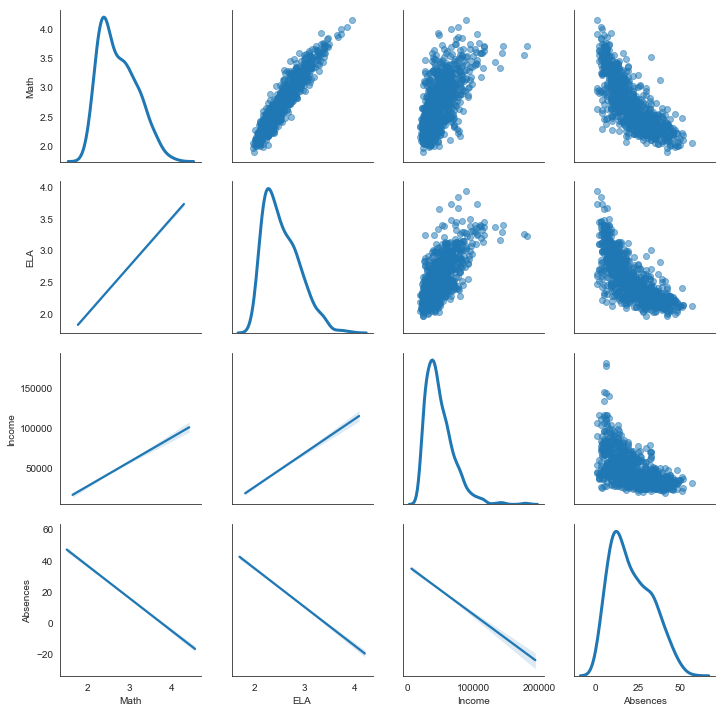

In [12]:
sns.set_style('white')

grid = sns.PairGrid(df_condensed, diag_sharey=False)
grid.map_upper(plt.scatter, alpha = .5)
# Fit line summarizing the linear relationship of the two variables.
grid.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
grid.map_diag(sns.kdeplot, lw=3)
plt.show()

              Math       ELA    Income  Absences
Math      1.000000  0.947365  0.625475 -0.772127
ELA       0.947365  1.000000  0.699064 -0.735283
Income    0.625475  0.699064  1.000000 -0.563720
Absences -0.772127 -0.735283 -0.563720  1.000000


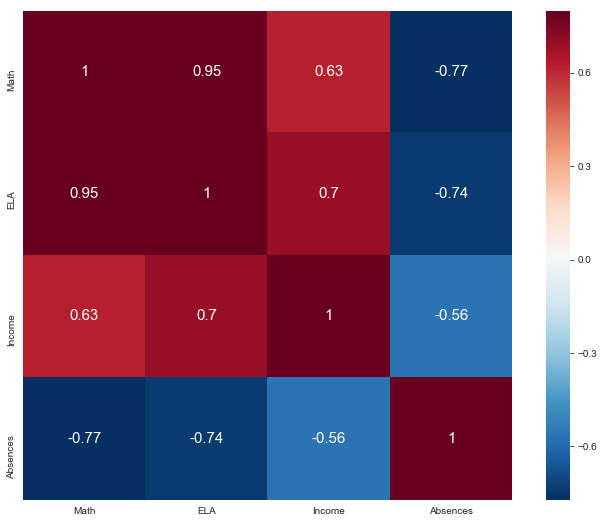

In [13]:
# Make the correlation matrix.
corrmat = df_condensed.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True,annot = True, annot_kws={"size": 15}, cmap= 'RdBu_r')
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

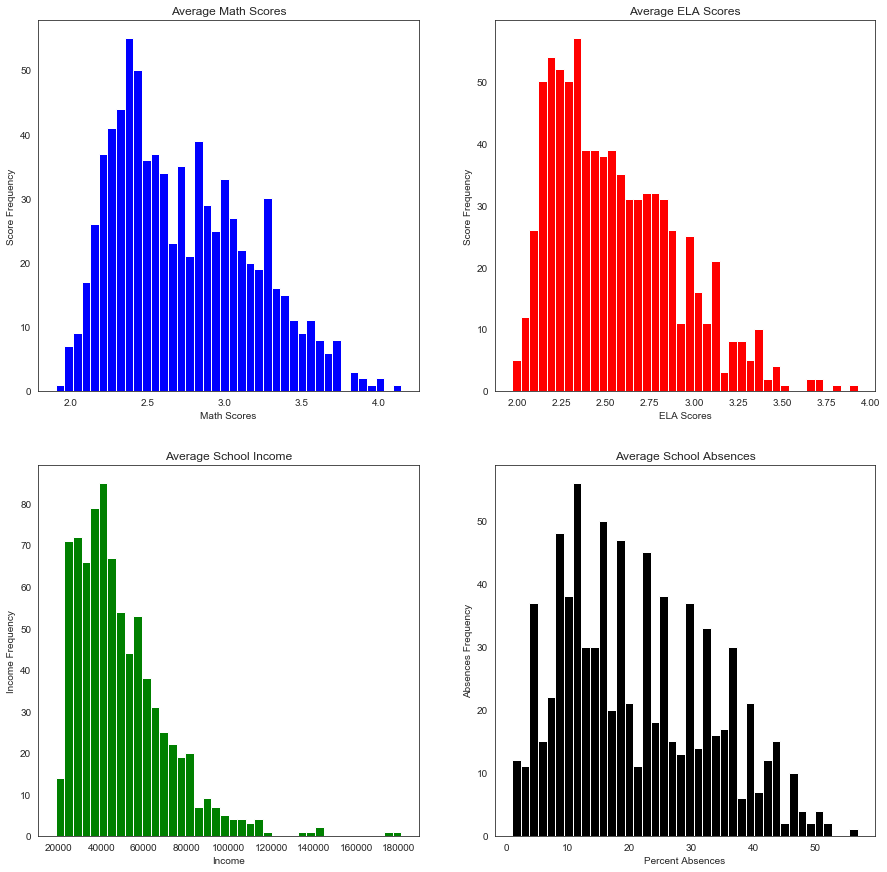

In [14]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.hist(df_condensed["Math"], color = 'blue', bins = 40)
plt.ylabel('Score Frequency')
plt.xlabel('Math Scores')
plt.title('Average Math Scores')

plt.subplot(2,2,2)
plt.hist(df_condensed["ELA"], color = 'red', bins = 40)
plt.ylabel('Score Frequency')
plt.xlabel('ELA Scores')
plt.title('Average ELA Scores')

plt.subplot(2, 2, 3)
plt.hist(df_condensed["Income"], color = 'green', bins = 40)
plt.ylabel('Income Frequency')
plt.xlabel('Income')
plt.title('Average School Income')

plt.subplot(2,2,4)
plt.hist(df_condensed["Absences"], color = 'black', bins = 40)
plt.ylabel('Absences Frequency')
plt.xlabel('Percent Absences')
plt.title('Average School Absences')

plt.show()

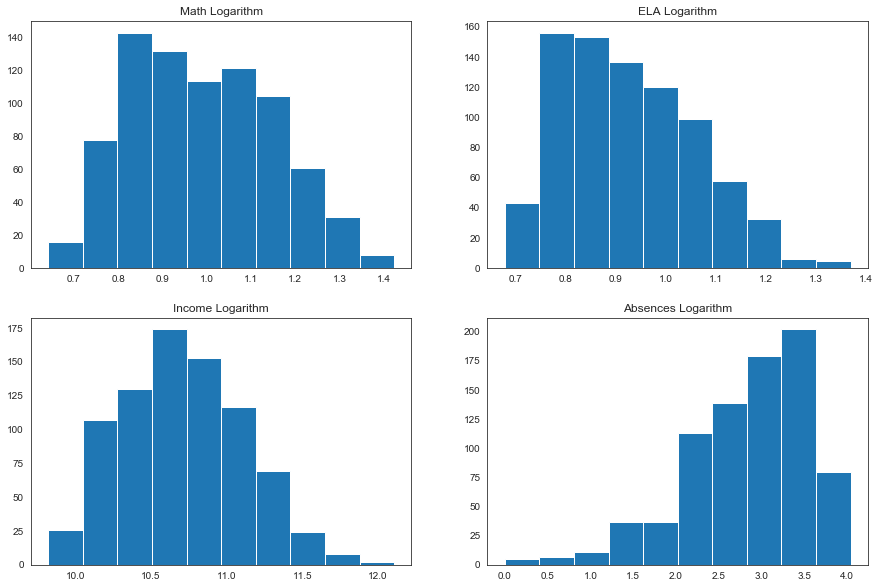

In [15]:
# Making a four-panel plot.
fig = plt.figure(figsize=(15,10))

fig.add_subplot(2,2,1)
plt.hist(np.log(df_condensed['Math']))
plt.title('Math Logarithm')

fig.add_subplot(2,2,2)
plt.hist(np.log(df_condensed['ELA']))
plt.title('ELA Logarithm')

fig.add_subplot(223)
plt.hist(np.log(df_condensed['Income']))
plt.title('Income Logarithm')

fig.add_subplot(224)
plt.hist(np.log(df_condensed['Absences']))
plt.title('Absences Logarithm')
plt.show()


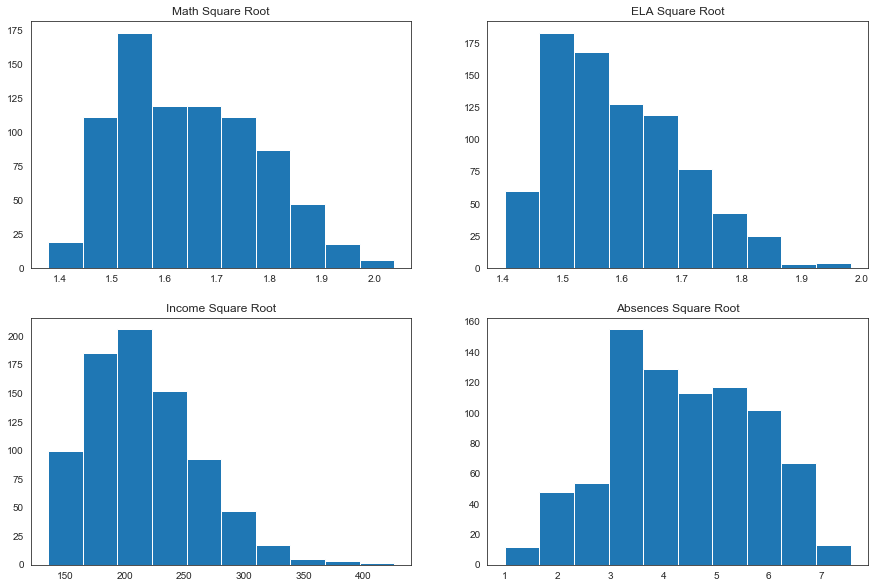

In [16]:
fig2 = plt.figure(figsize=(15,10))

fig2.add_subplot(2,2,1)
plt.hist(np.sqrt(df_condensed['Math']))
plt.title('Math Square Root')

fig2.add_subplot(2,2,2)
plt.hist(np.sqrt(df_condensed['ELA']))
plt.title('ELA Square Root')

fig2.add_subplot(223)
plt.hist(np.sqrt(df_condensed['Income']))
plt.title('Income Square Root')

fig2.add_subplot(224)
plt.hist(np.sqrt(df_condensed['Absences']))
plt.title('Absences Square Root')
plt.show()

## Let's introduce some features

In [17]:
features = pd.get_dummies(df_condensed['City'])

features['above_average_ELA'] = np.where(df_condensed['ELA'] >= 3, 1, 0)

print(df_condensed['ELA'].groupby(features['above_average_ELA']).describe())

                   count      mean       std   min    25%   50%    75%   max
above_average_ELA                                                           
0                  715.0  2.461497  0.257827  1.97  2.250  2.43  2.665  2.99
1                   95.0  3.221684  0.195348  3.00  3.085  3.14  3.325  3.93


In [18]:
features['above_average_math'] = np.where(df_condensed['Math'] >= 3, 1, 0)

print(df_condensed['Math'].groupby(features['above_average_math']).describe())

                    count      mean       std  min   25%   50%    75%   max
above_average_math                                                         
0                   587.0  2.506150  0.260854  1.9  2.30  2.48  2.725  2.99
1                   223.0  3.312018  0.233921  3.0  3.13  3.27  3.445  4.15


In [19]:
features['above_average_absences'] = np.where(df_condensed['Absences'] >= 40, 1, 0)

print(df_condensed['Absences'].groupby(features['above_average_absences']).describe())

                        count       mean        std   min   25%   50%   75%  \
above_average_absences                                                        
0                       741.0  18.935223  10.031766   1.0  11.0  18.0  27.0   
1                        69.0  44.217391   3.673713  40.0  42.0  43.0  46.0   

                         max  
above_average_absences        
0                       39.0  
1                       57.0  


In [20]:
features['above_average_income'] = np.where(df_condensed['Income'] >= 80000, 1, 0)

print(df_condensed['Income'].groupby(features['above_average_income']).describe())

                      count          mean           std       min        25%  \
above_average_income                                                           
0                     742.0  44389.448693  14859.879660  18409.76  33147.985   
1                      68.0  98279.135294  20996.439118  80042.25  83311.705   

                           50%          75%        max  
above_average_income                                    
0                     42143.59   55582.6850   79967.66  
1                     91514.98  104813.5425  181382.06  


In [21]:
features['scores'] = df_condensed['ELA'].dropna() * df_condensed['Math'].dropna()
print (features['scores'])

0        4.6438
1        7.8374
2        6.0706
3        6.1256
4        6.0452
5        5.6792
6        8.9600
7        6.2244
8        5.0167
9        4.9896
10      11.7612
11       5.0344
14       9.1520
16       8.6411
17       6.8340
18       9.5480
21      15.4349
23       8.1326
24       8.9100
25      10.5369
26      12.6140
27      10.4520
28      10.3360
29      12.3735
30      12.7280
32       7.2165
33      11.7288
34      14.5843
35      11.9833
37       5.9033
         ...   
1221     6.0888
1222     7.0560
1223     5.8280
1224     7.7380
1225     8.4560
1227     5.7348
1230     9.4464
1231     8.6881
1233     5.9182
1235     9.6525
1238     6.1985
1239     6.0973
1240    11.2428
1243    10.0464
1246     7.5589
1247     7.8128
1249     5.0609
1250     7.1484
1251     7.2165
1253     5.6580
1256     7.6629
1258     8.8013
1262    10.5600
1263     9.6354
1264     4.5854
1267     6.4480
1268     7.1250
1269     8.5593
1270     8.5540
1271     8.7406
Name: scores, Length: 81

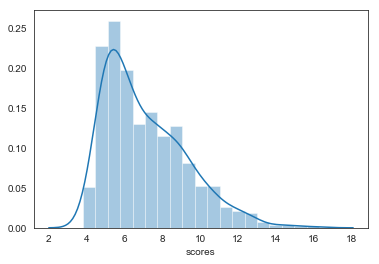

In [22]:
sns.distplot(features['scores'],)

In [23]:
features['bad_bourough'] = np.where((df_condensed['City'].isin(['BRONX', 'BROOKLYN'])), 1, 0)


In [24]:
print (features['bad_bourough'].value_counts())

1    434
0    376
Name: bad_bourough, dtype: int64


In [25]:
df_low = df_condensed.loc[
    ((df_condensed['City'] == 'BRONX') | (df_condensed['City'] == 'BROOKLYN')),
    ['Income','Math','ELA','Absences','City']
]

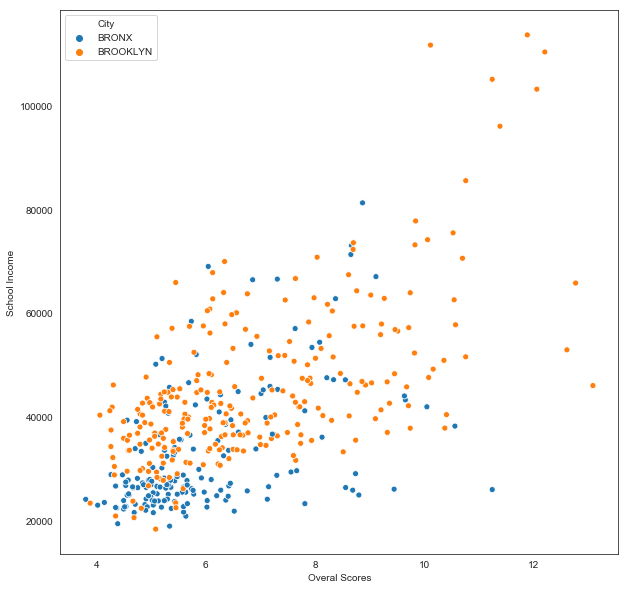

In [26]:
plt.figure(figsize= (10,10))

sns.scatterplot(
    x =features['scores'],
    y =df_condensed['Income'],
    hue = df_low['City']
)
plt.xlabel('Overal Scores')
plt.ylabel('School Income')
plt.show()

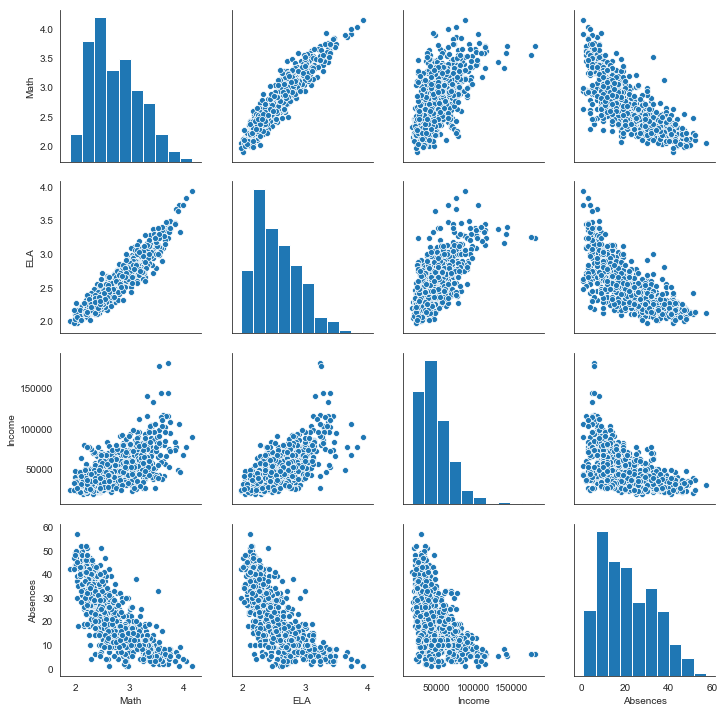

In [27]:
sns.pairplot(df_condensed.drop(['City'], axis = 1))

In [28]:
features['log_math_abs'] = np.log(df_condensed['Math'] * df_condensed['Absences'])

features['square_math_abs'] = (df_condensed['Math'] * df_condensed['Absences'])

features['income_inverse'] = (1/df_condensed['Income'])

features['log_math_abs'].describe()

count    810.000000
mean       3.835303
std        0.595630
min        0.966984
25%        3.503300
50%        3.933194
75%        4.287476
max        4.840084
Name: log_math_abs, dtype: float64

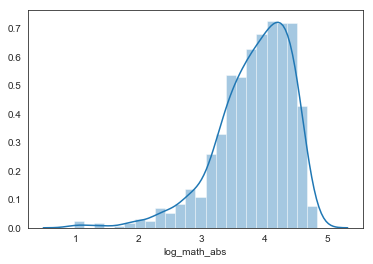

In [29]:
sns.distplot(features['log_math_abs'])

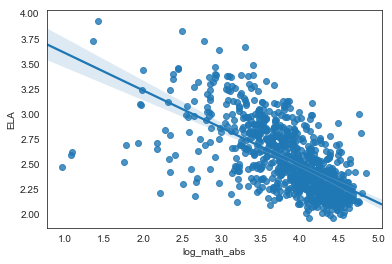

In [30]:


sns.regplot(features['log_math_abs'], y = df_condensed['ELA'])

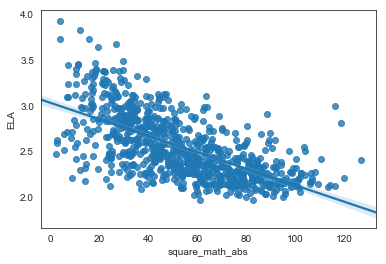

In [31]:
sns.regplot(features['square_math_abs'], y = df_condensed['ELA'])

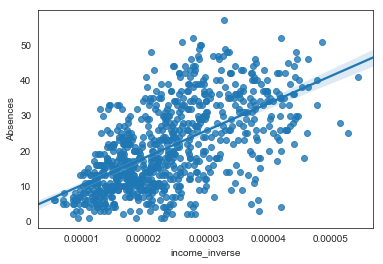

In [33]:
sns.regplot(features['income_inverse'], y = df_condensed['Absences'])

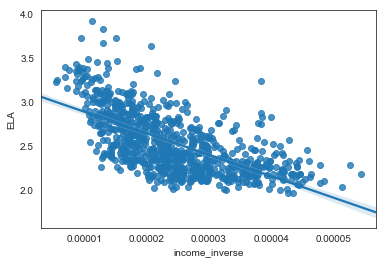

In [34]:
sns.regplot(features['income_inverse'], y = df_condensed['ELA'])

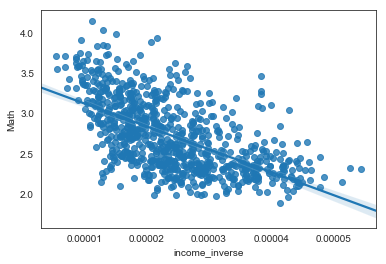

In [35]:
sns.regplot(features['income_inverse'], y = df_condensed['Math'])